# 1 Heart Failure Detection
## 2 Outiline
* Data exploration
* Train test split

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [86]:
file_name = "heart.csv"
hfd = pd.read_csv(file_name)

In [87]:
hfd.shape

(918, 12)

In [88]:
hfd.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [89]:
hfd.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [90]:
hfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Feature Selection

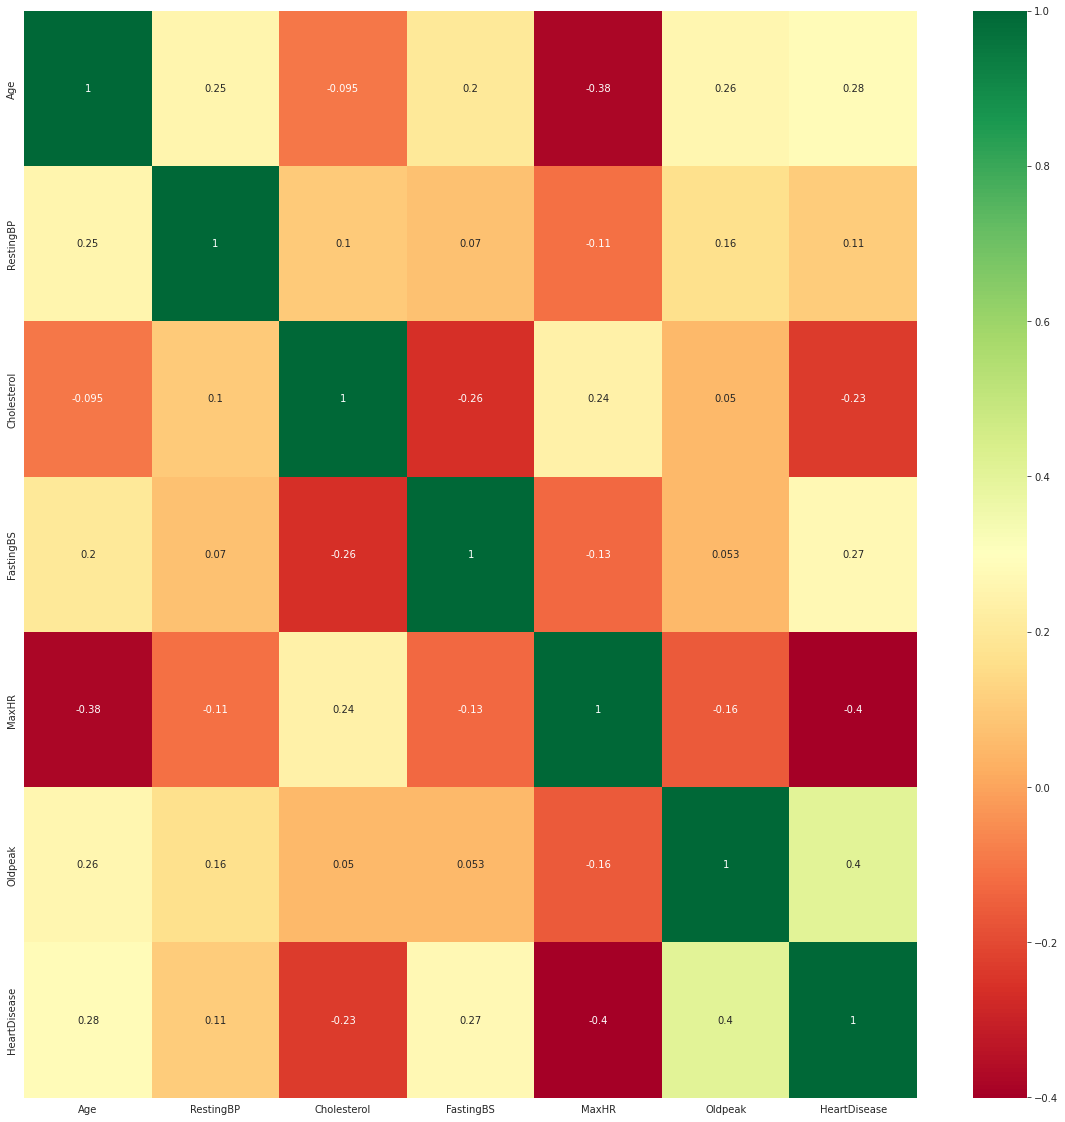

In [91]:
import seaborn as sns
corrmat = hfd.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat, annot=True, cmap="RdYlGn")

In [92]:
corrmat

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

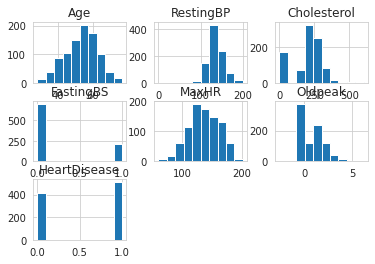

In [93]:
hfd.hist()

## The data is more or less balanced

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

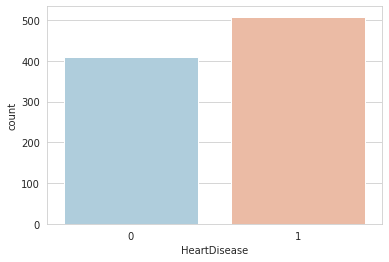

In [94]:
sns.set_style('whitegrid')
sns.countplot(x='HeartDisease', data=hfd, palette='RdBu_r')

## Machine Learning

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
# Transform categorical attributes into integer values
hfd = pd.get_dummies(hfd, columns = ['Sex','ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
hfd.head

<bound method NDFrame.head of      Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_F  Sex_M  ChestPainType_ASY  ...  Ch

In [97]:
# Scale continous data to normal distribution
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
columns_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
hfd[columns_to_scale] = standard_scaler.fit_transform(hfd[columns_to_scale])

In [98]:
hfd.head

<bound method NDFrame.head of           Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0   -1.433140   0.410909     0.825070          0  1.382928 -0.832432   
1   -0.478484   1.491752    -0.171961          0  0.754157  0.105664   
2   -1.751359  -0.129513     0.770188          0 -1.525138 -0.832432   
3   -0.584556   0.302825     0.139040          0 -1.132156  0.574711   
4    0.051881   0.951331    -0.034755          0 -0.581981 -0.832432   
..        ...        ...          ...        ...       ...       ...   
913 -0.902775  -1.210356     0.596393          0 -0.188999  0.293283   
914  1.536902   0.627078    -0.053049          1  0.164684  2.357094   
915  0.370100  -0.129513    -0.620168          0 -0.857069  0.293283   
916  0.370100  -0.129513     0.340275          0  1.461525 -0.832432   
917 -1.645286   0.302825    -0.217696          0  1.422226 -0.832432   

     HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0               0      0   

In [99]:
y = hfd['HeartDisease']
X = hfd.drop(['HeartDisease'], axis=1)

In [100]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

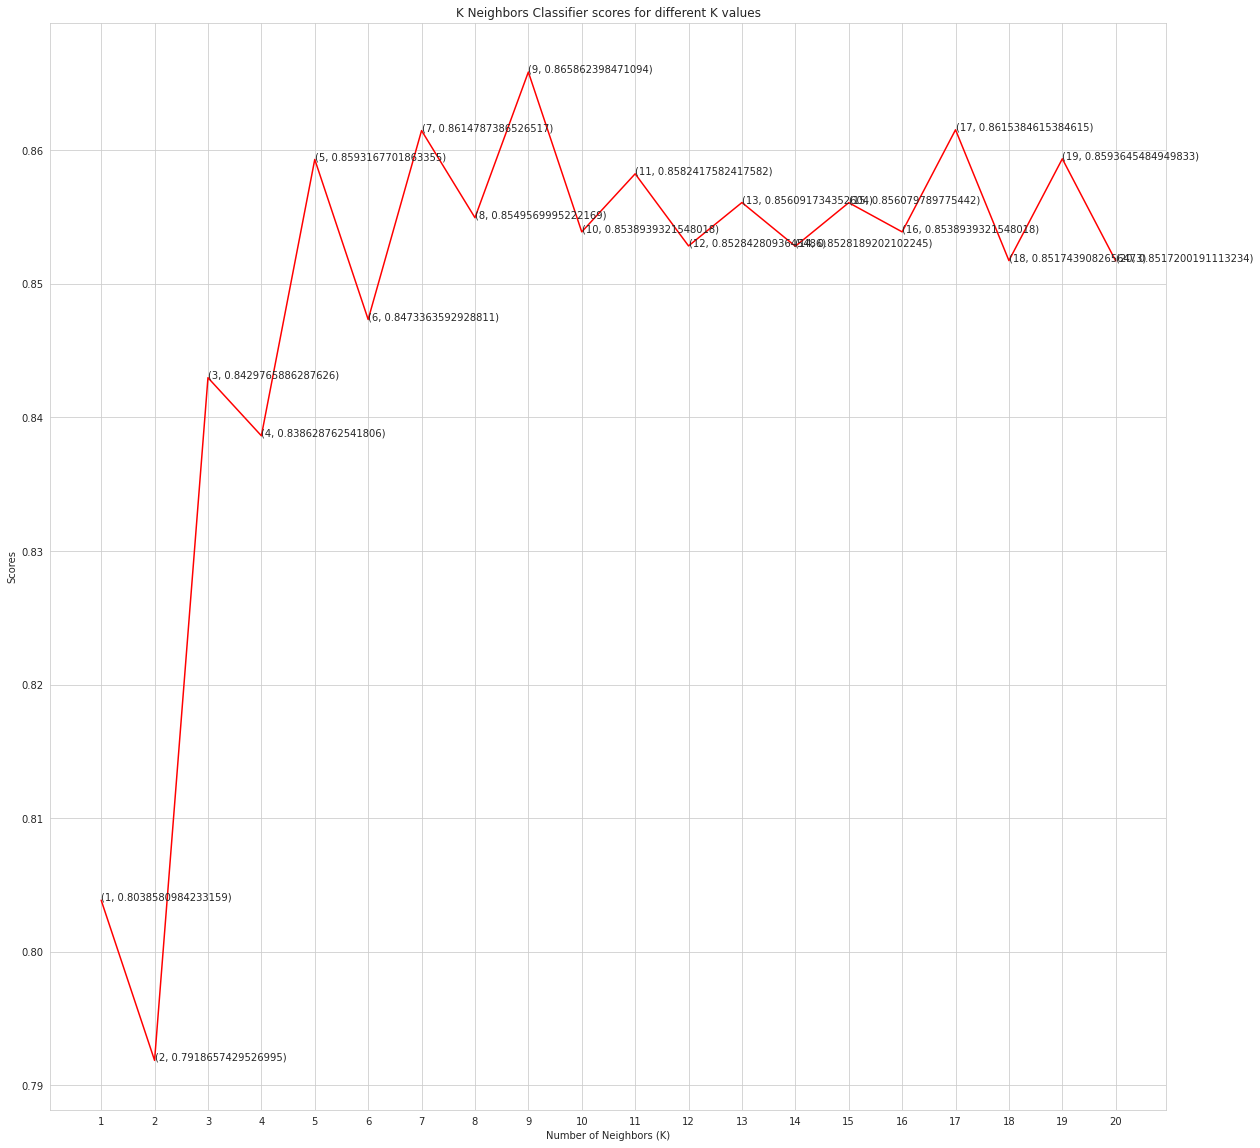

In [105]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [102]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.8528428093645486

In [103]:
knn_classifier = KNeighborsClassifier(n_neighbors = 9) 
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.865862398471094

In [104]:
knn_classifier = KNeighborsClassifier(n_neighbors = 17) 
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.8615384615384615